# Precedence-Constrained Winter Value for Effective Graph Data Valuation

Assignments:  
1. reproduce the PC-Winter results in Cora, Citeseer, and PubMed
2. Test out Wiki-cs-dataset



name: John (chenxi) Song  
date: 12/03/2024

# 0. Environment Setup

python== 3.9  
pytorch== 2.5.1   
Cuda== 11.8  
torch-geometric==2.6.1  
scikit-learn==1.5.2

In [39]:
import torch

if torch.cuda.is_available():
    print(f"Cuda version: {torch.version.cuda}")

    for i in range(torch.cuda.device_count()):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
    
else:
    print("CUDA is not avaliable")

Cuda version: 11.8
GPU 0: NVIDIA RTX A5000


# 1. Reproduce PC-Winter

## 1.1 Dataset Loading

In [4]:
from torch_geometric.datasets import Planetoid
import torch_geometric.transforms as T

In [11]:
display_info('Cora')

Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7
Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Training node label rate: 0.05
Has isolated nodes: False
Has self-loops: False
Is undirected: True


In [14]:
display_info('PubMed')

Dataset: PubMed():
Number of graphs: 1
Number of features: 500
Number of classes: 3
Data(x=[19717, 500], edge_index=[2, 88648], y=[19717], train_mask=[19717], val_mask=[19717], test_mask=[19717])
Number of nodes: 19717
Number of edges: 88648
Average node degree: 4.50
Number of training nodes: 60
Training node label rate: 0.00
Has isolated nodes: False
Has self-loops: False
Is undirected: True


In [15]:
display_info('CiteSeer')

Dataset: CiteSeer():
Number of graphs: 1
Number of features: 3703
Number of classes: 6
Data(x=[3327, 3703], edge_index=[2, 9104], y=[3327], train_mask=[3327], val_mask=[3327], test_mask=[3327])
Number of nodes: 3327
Number of edges: 9104
Average node degree: 2.74
Number of training nodes: 120
Training node label rate: 0.04
Has isolated nodes: True
Has self-loops: False
Is undirected: True


## 1.2 Model Training & node drop experiment

The coding is from the paper (Precedence-Constrained Winter Value for Effective Graph Data Valuation)  

`pc_winter_run.py` file to model training and calcuate the pc winter value  

`the seed= 101 | number of permutaion = 10 | truncate ratio= 0.5-0.7`   

`node_drop_large_cora.py` file to perform the node drop experiment

## 1.3 Plot node drop PC-winter value

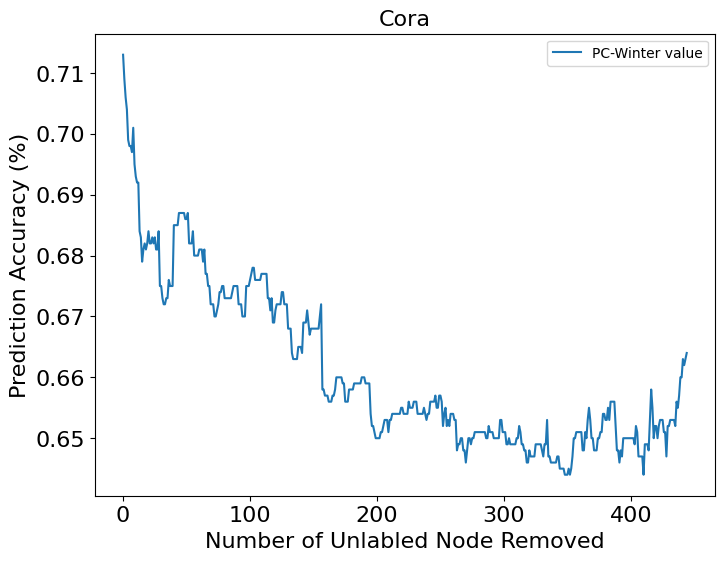

In [20]:
plot('./res/node_drop_large_winter_value_0.5_0.7_1_cora_test.pkl', 'Cora')

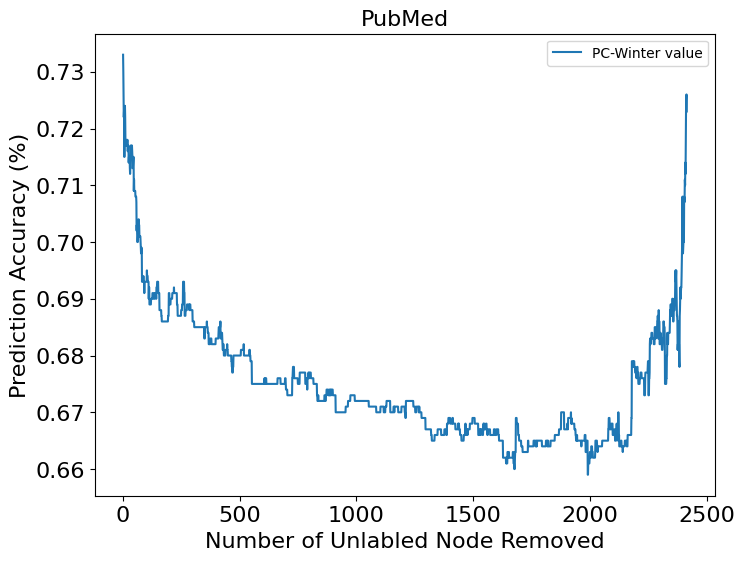

In [21]:
plot('./res/node_drop_large_winter_value_0.5_0.7_1_PubMed_test.pkl', 'PubMed')

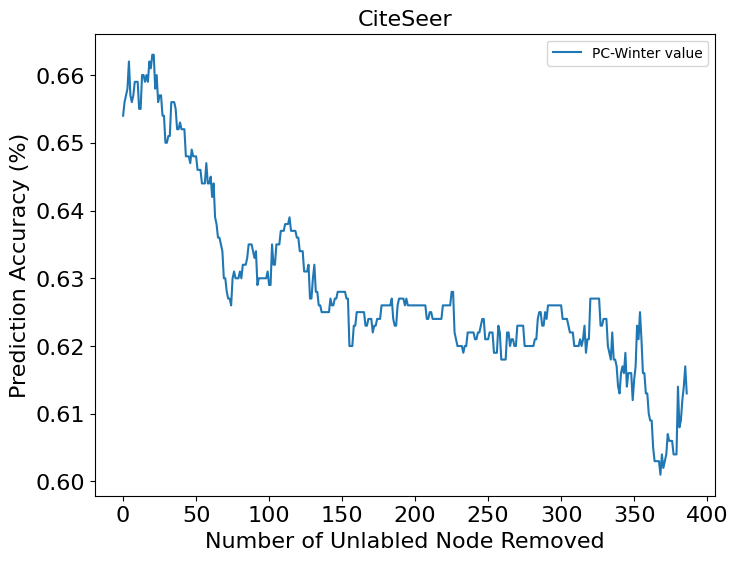

In [22]:
plot('./res/node_drop_large_winter_value_0.5_0.7_1_CiteSeer_test.pkl', 'CiteSeer')

# 2. WikiCS dataset Winter Value

## 2.1 Data Loading

In [23]:
from torch_geometric.datasets import WikiCS

In [24]:
dataset = WikiCS(root="test1",transform=T.NormalizeFeatures(), is_undirected=False)

Processing...
Done!


In [26]:
display_info2(dataset)

Dataset: WikiCS():
Number of graphs: 1
Number of features: 300
Number of classes: 10
Data(x=[11701, 300], edge_index=[2, 297110], y=[11701], train_mask=[11701, 20], val_mask=[11701, 20], test_mask=[11701], stopping_mask=[11701, 20])
Number of nodes: 11701
Number of edges: 297110
Average node degree: 25.39
Number of training nodes: 11600
Training node label rate: 0.99
Has isolated nodes: True
Has self-loops: True
Is undirected: False


**WikiCS is a large dataset, and contain 20 splits for both train and validation. In this experiment, I will only use split 0 and 1 as prelimiary study to run experiment due to limitaion of computaional resources.**

## 2.2 Model Training & node drop experiment

Following the same workflow as section 1 to get PC-Winter value and perform node-dropping experiment  

#### Experiments  
1. train and validation split on first dataset with number of permutation = 1
2. train and validation split on second dataset with number of permutation = 1, 5, 10.


#### Total time used: 
It tooks up to 15 hours to performance number of permutation = 10.   
The total hours hour experiment are around 24 hours. 

## 2.3 Plot node drop PC-winter value

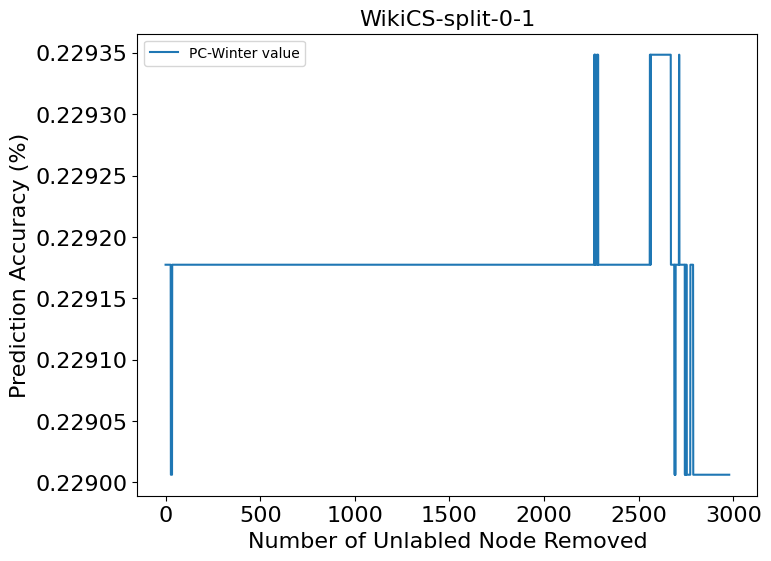

In [28]:
plot('./res/node_drop_large_winter_value_0.5_0.7_1_WikiCS_test0.pkl', 'WikiCS-split-0-1')

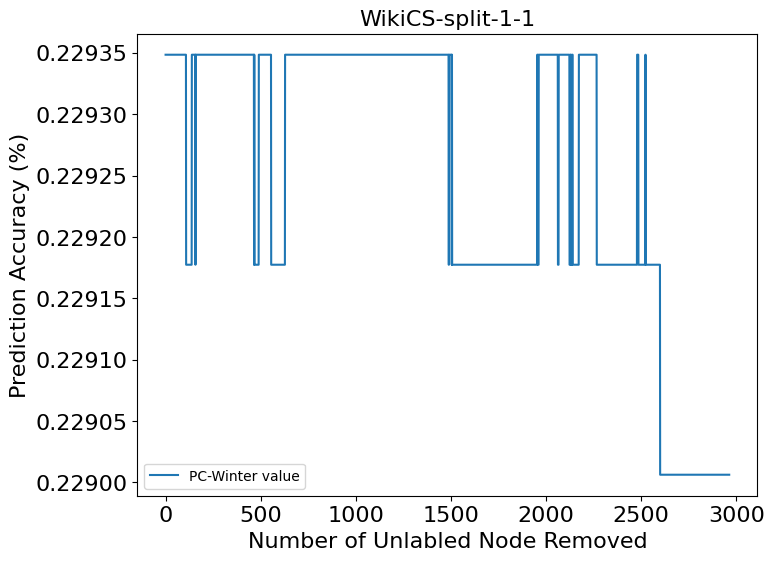

In [29]:
plot('./res/node_drop_large_winter_value_0.5_0.7_1_WikiCS_test1.pkl', 'WikiCS-split-1-1')

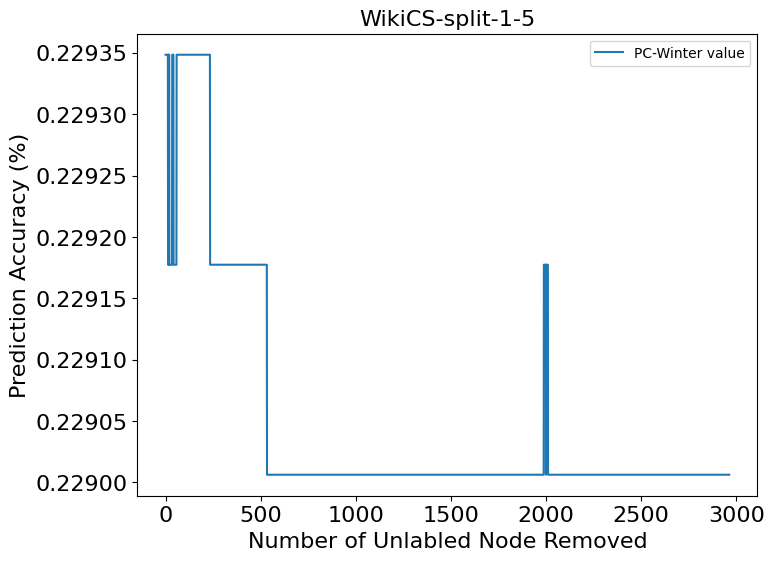

In [31]:
plot('./res/node_drop_large_winter_value_0.5_0.7_1_WikiCS_test1_5.pkl', 'WikiCS-split-1-5')

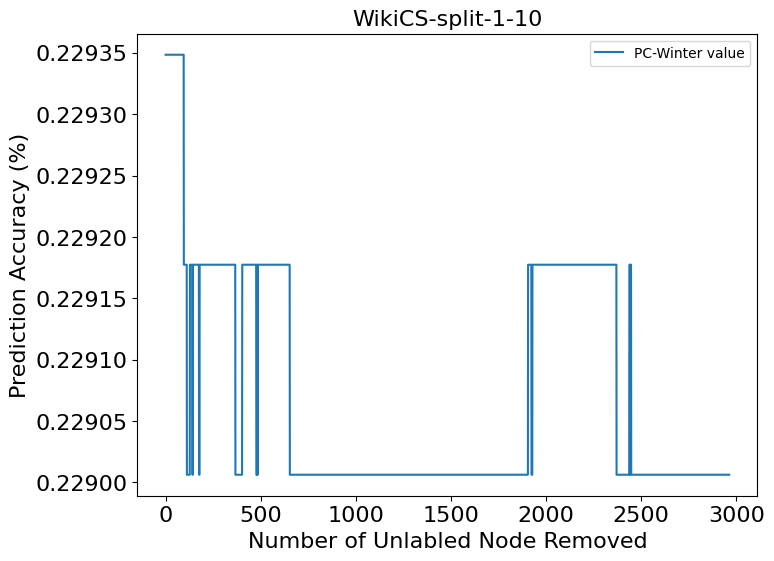

In [32]:
plot('./res/node_drop_large_winter_value_0.5_0.7_1_WikiCS_test1_10.pkl', 'WikiCS-split-1-10')

In [33]:
file_paths = ['./res/node_drop_large_winter_value_0.5_0.7_1_WikiCS_test1.pkl', 
              './res/node_drop_large_winter_value_0.5_0.7_1_WikiCS_test1_5.pkl', 
              './res/node_drop_large_winter_value_0.5_0.7_1_WikiCS_test1_10.pkl']
labels = ['WikiCS-split-1-1', 'WikiCS-split-1-5', 'WikiCS-split-1-10']

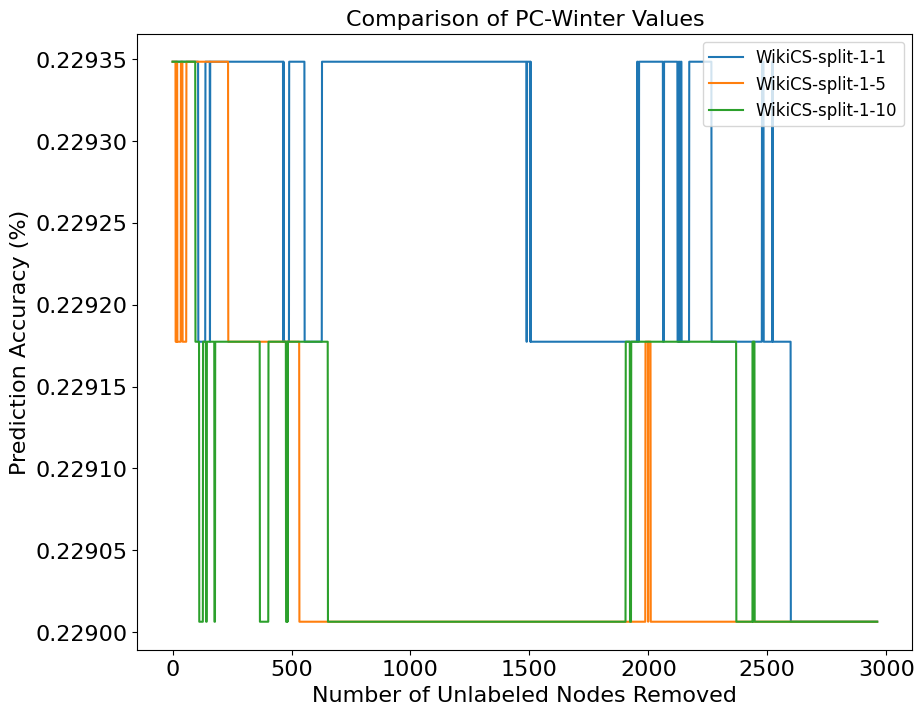

In [34]:
plt.figure(figsize=(10, 8))

# Loop through each file path and plot
for file_path, label in zip(file_paths, labels):
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
    
    plt.plot(data, label=label)

# Set the x and y axis labels with increased font size
plt.xlabel('Number of Unlabeled Nodes Removed', fontsize=16)
plt.ylabel('Prediction Accuracy (%)', fontsize=16)
plt.title('Comparison of PC-Winter Values', fontsize=16)

# Increase the size of the tick labels for both axes
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Show legend
plt.legend(fontsize=12)

# Display the plot
plt.show()

## 2.4 Results, Observation and Conclusion

### 2.4.1 Results  

From dataset first split and second split, the accuracy range is from 0.229 to 0.22935.   

Based on node-dropping experiment graphs, dropping high unlabled node value cause performance decrease. This phenomena aligns with author's concept that PC-winter value that measure the valuable of graph data. In machine learning, valuable data could increase performance.

### 2.4.2 Observation  

1. For WikiCS dataset:  as removing high value of unlabled nodes, performance decrease but never jump back at the end.
2. The trending is like step shape which some unlabeled node do not affect performance, some of them dramatically decrease performance. (It may be some unlabel data have bigger impact on final labeled node)
3. As number of permutations goes up, the graph trend start to become similar.
4. removing some unlabeled nodes could increase performance between 1500-2000 nodes range. 
       

### 2.4.3 Conclusion  

The experiments successfully demonstrate that the PC-winter value significantly impacts both data and performance. This innovative measurement concept, derived from individual data points, introduces strategies to optimize computational resource usage. For the WikiCS dataset, incorporating all datasets and including stop nodes could enhance performance stability. Additionally, as WikiCS contains self-loop node structures, further investigation is needed to assess their impact on the results. Overall, this preliminary study highlights the utility of the PC-winter value, particularly when applied to the WikiCS dataset.

# Utility Functions

In [10]:
def display_info(dataset_name):
    
    dataset = Planetoid(root='test1/' + dataset_name, name=dataset_name, transform=T.NormalizeFeatures())
    print(f'Dataset: {dataset}:')
    print('======================')
    print(f'Number of graphs: {len(dataset)}')
    print(f'Number of features: {dataset.num_features}')
    print(f'Number of classes: {dataset.num_classes}')
    print('==============================================================')
    data = dataset[0]  # Get the first graph object.
    
    print(data)
    print('==============================================================')
    
    # Gather some statistics about the graph.
    print(f'Number of nodes: {data.num_nodes}')
    print(f'Number of edges: {data.num_edges}')
    print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
    print(f'Number of training nodes: {data.train_mask.sum()}')
    print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
    print(f'Has isolated nodes: {data.has_isolated_nodes()}')
    print(f'Has self-loops: {data.has_self_loops()}')
    print(f'Is undirected: {data.is_undirected()}')

In [25]:
def display_info2(dataset):
    print(f'Dataset: {dataset}:')
    print('======================')
    print(f'Number of graphs: {len(dataset)}')
    print(f'Number of features: {dataset.num_features}')
    print(f'Number of classes: {dataset.num_classes}')
    print('==============================================================')
    data = dataset[0]  # Get the first graph object.
    
    print(data)
    print('==============================================================')
    
    # Gather some statistics about the graph.
    print(f'Number of nodes: {data.num_nodes}')
    print(f'Number of edges: {data.num_edges}')
    print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
    print(f'Number of training nodes: {data.train_mask.sum()}')
    print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
    print(f'Has isolated nodes: {data.has_isolated_nodes()}')
    print(f'Has self-loops: {data.has_self_loops()}')
    print(f'Is undirected: {data.is_undirected()}')

In [17]:
import pickle
import collections
import matplotlib.pyplot as plt

In [19]:
## code is from the paper. 
def plot(file_path, name): 
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
    
    plt.figure(figsize=(8, 6))
    
    plt.plot(data, label='PC-Winter value')
    
    # Set the x and y axis labels with increased font size
    plt.xlabel('Number of Unlabled Node Removed', fontsize=16)
    plt.ylabel('Prediction Accuracy (%)', fontsize=16)
    plt.title(name, fontsize=16)
    
    # Increase the size of the tick labels for both axes
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    # Show legend
    plt.legend()
    
    # Displaying the plot
    plt.show()